In [ ]:

### pycaretの環境構築に毎回時間がかかる。gitからinstallするやり方で行い、ランタイムの再起動をすること。
!pip install git+https://github.com/pycaret/pycaret.git@master --upgrade -q
# print("pycaret version: ", pycaret.__version__)


In [1]:
from google.colab import drive
drive.mount('/content/drive')  #listになかったのでドライブ上にデータ保存し、ドライブをマウント。

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
import sys
sys.path.append('/content/drive/MyDrive/signate/モジュール系/EDA')
sys.path.append('/content/drive/MyDrive/signate/モジュール系/Feature Engineering')
sys.path.append('/content/drive/MyDrive/signate/モジュール系/meanF1')

In [54]:
### 自作モジュール
from plot_qq_plots import plot_qq_plots
from reduce_mem import reduce_mem_usage
from show_corr import show_corr
from target_encoded import get_kfold, get_targetencoding, to_target
from obj_to_cat import to_cat_data
from normalize_col import normalize_columns
from combined_features import create_combined_features
from threshold_tuning_binary import threshold_tuning_binary

In [4]:
### その他
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [5]:
pd.set_option('display.max_columns', None)



---



In [7]:
FE_train = pd.read_csv("/content/drive/MyDrive/signate/債務不履行/途中経過_csv/FE_train")
FE_test = pd.read_csv("/content/drive/MyDrive/signate/債務不履行/途中経過_csv/FE_test")

In [9]:
FE_train.head()

,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,RevLineCr,LowDoc,MIS_Status,Sector,ApprovalFY,City,State,BankState,DisbursementGross,GrAppv,SBA_Appv,UrbanRural,Franchise_Not,DisbursementGross_plus_SBA_Appv,DisbursementGross_minus_SBA_Appv,DisbursementGross_times_SBA_Appv,DisbursementGross_divided_by_SBA_Appv,SBA_Appv_plus_GrAppv,SBA_Appv_minus_GrAppv,SBA_Appv_times_GrAppv,SBA_Appv_divided_by_GrAppv,DisbursementDate_timestamp,ApprovalDate_timestamp,DisbursementDate_Year,DisbursementDate_Month,DisbursementDate_Day,ApprovalDate_Year,ApprovalDate_Month,ApprovalDate_Day,target_NoEmp,target_NewExist,target_CreateJob,target_RetainedJob,target_RevLineCr,target_LowDoc,target_Sector,target_ApprovalFY,target_City,target_State,target_BankState,target_UrbanRural,target_Franchise_Not,target_DisbursementDate_Year,target_DisbursementDate_Month,target_DisbursementDate_Day,target_ApprovalDate_Year,target_ApprovalDate_Month,target_ApprovalDate_Day
0,163,21,1.0,0,0,1,1,3,1,NaN,2006,1857,3,41,-0.399474,-0.379998,-0.338594,0,True,-0.376908,-0.348687,-0.241432,1.176471,-0.362947,0.400124,-0.246556,0.85,-0.559749,0.846519,21,0,24,29,11,14,0.954819,0.910323,0.904723,0.916514,0.924868,0.908273,NaN,0.876591,0.912698,0.908228,0.939937,0.945563,0.894903,0.954931,0.908166,0.886719,0.882273,0.892972,0.913272
1,84,6,1.0,4,0,0,0,3,1,62.0,1992,1451,36,36,0.432786,0.457168,0.447553,0,True,0.445355,0.183318,-0.025699,1.250000,0.454990,-0.345648,-0.028450,0.80,-1.242225,-1.584849,16,1,24,15,8,23,0.936090,0.908982,0.948260,0.916715,0.893256,0.907312,0.890526,0.927559,1.000000,0.906921,0.916435,0.946101,0.894128,0.931186,0.861102,0.883944,0.925117,0.869600,0.867398
2,242,45,1.0,4,90,0,1,3,1,42.0,2001,1021,31,31,-0.592531,-0.582212,-0.596427,1,True,-0.602254,-0.290295,-0.259132,2.132200,-0.591509,0.350844,-0.264559,0.50,0.015061,-0.081209,24,10,24,24,6,9,0.951220,0.909234,0.940734,1.000000,0.923958,0.908134,0.899727,0.898455,1.000000,0.949468,0.952703,0.825198,0.895347,0.914486,0.928876,0.888567,0.896624,0.876524,0.844156
3,237,4,1.0,0,0,0,1,3,1,33.0,2004,1610,42,41,0.199592,0.222600,0.444634,0,True,0.314631,-0.489305,-0.073710,1.000000,0.324955,0.597244,-0.076989,1.00,0.977912,0.340315,30,10,24,26,1,27,0.893032,0.909026,0.904341,0.916034,0.923889,0.907469,0.913000,0.903582,0.964361,0.927489,0.941023,0.944465,0.894320,0.865079,0.925705,0.886486,0.893713,0.929084,0.886420
4,184,0,1.0,0,0,0,1,3,1,NaN,2000,1893,4,4,1.389684,1.419706,1.246104,0,True,1.342460,1.048705,0.476827,1.333333,1.347377,-1.558760,0.479606,0.75,-2.911283,-0.309516,6,8,29,22,3,8,0.803120,0.908982,0.904815,0.916715,0.923693,0.907312,NaN,0.920891,0.916309,0.883054,0.879085,0.946101,0.894128,0.913462,0.902031,0.932075,0.911030,0.887951,0.920712


In [11]:
FE_train = reduce_mem_usage(FE_train)
FE_test = reduce_mem_usage(FE_test)

Memory usage of dataframe is 17.15 MB
Memory usage after optimization is: 3.91 MB
Decreased by 77.2%
Memory usage of dataframe is 16.83 MB
Memory usage after optimization is: 3.87 MB
Decreased by 77.0%


In [12]:
FE_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42307 entries, 0 to 42306
Data columns (total 54 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Term                                   42307 non-null  int16  
 1   NoEmp                                  42307 non-null  int16  
 2   NewExist                               42307 non-null  float16
 3   CreateJob                              42307 non-null  int8   
 4   RetainedJob                            42307 non-null  int16  
 5   FranchiseCode                          42307 non-null  int32  
 6   RevLineCr                              42307 non-null  int8   
 7   LowDoc                                 42307 non-null  int8   
 8   MIS_Status                             42307 non-null  int8   
 9   Sector                                 32509 non-null  float16
 10  ApprovalFY                             42307 non-null  int16  
 11  Ci

**pycaret**

In [14]:
from pycaret.datasets import get_data
from pycaret.classification import *

from sklearn.model_selection import train_test_split

In [15]:
### データ前処理
tr = FE_train #pycaretに学習させるデータ(blueWins込)
test = FE_test #最終的なテストデータ


# データ分割
X = tr.drop(['MIS_Status'], axis=1)
y = tr['MIS_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [16]:
data = tr  # 使用するデータセット
s = setup(data, target='MIS_Status')  # ターゲット列を指定

,Description,Value
0,Session id,5219
1,Target,MIS_Status
2,Target type,Binary
3,Original data shape,"(42307, 54)"
4,Transformed data shape,"(42307, 54)"
5,Transformed train set shape,"(29614, 54)"
6,Transformed test set shape,"(12693, 54)"
7,Numeric features,53
8,Rows with missing values,28.0%
9,Preprocess,True


In [18]:
### meanF1をcompareで最適化するため
from sklearn.metrics import f1_score, make_scorer

# カスタムスコアラーの定義
def mean_f1(y_true, y_pred):
    # ラベルごとのF1スコアを計算し、その平均を返す
    f1 = f1_score(y_true, y_pred, average='macro')  # ここで'macro'を使用
    return f1

In [19]:
# カスタムスコアラーの追加
add_metric('mean_f1', 'Mean F1', mean_f1)

Name                                                           Mean F1
Display Name                                                   Mean F1
Score Function       <pycaret.internal.metrics.EncodedDecodedLabels...
Scorer                                            make_scorer(mean_f1)
Target                                                            pred
Args                                                                {}
Greater is Better                                                 True
Multiclass                                                        True
Custom                                                            True
Name: mean_f1, dtype: object

In [20]:
### モデル比較
best_model = compare_models(sort='mean_f1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Mean F1,TT (Sec)
lda,Linear Discriminant Analysis,0.9003,0.7624,0.9806,0.9140,0.9461,0.2902,0.3280,0.6397,0.4890
lightgbm,Light Gradient Boosting Machine,0.9029,0.7714,0.9862,0.9122,0.9477,0.2792,0.3314,0.6324,3.0310
rf,Random Forest Classifier,0.9045,0.7537,0.9887,0.9118,0.9487,0.2786,0.3390,0.6314,9.4470
gbc,Gradient Boosting Classifier,0.9040,0.7771,0.9882,0.9117,0.9484,0.2764,0.3351,0.6304,13.8820
xgboost,Extreme Gradient Boosting,0.9001,0.7524,0.9835,0.9116,0.9462,0.2663,0.3113,0.6263,1.2380
et,Extra Trees Classifier,0.9027,0.7536,0.9877,0.9108,0.9477,0.2647,0.3226,0.6242,4.6000
ada,Ada Boost Classifier,0.9033,0.7702,0.9901,0.9095,0.9481,0.2520,0.3186,0.6166,2.9820
qda,Quadratic Discriminant Analysis,0.7886,0.7404,0.8199,0.9354,0.8737,0.2404,0.2618,0.6116,0.2330
ridge,Ridge Classifier,0.9020,0.0000,0.9924,0.9066,0.9476,0.2168,0.2938,0.5969,0.1040
nb,Naive Bayes,0.7801,0.7010,0.8175,0.9275,0.8689,0.2005,0.2171,0.5916,0.1440


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [22]:
# create individual models for stacking
gbc = create_model('gbc')
lgb = create_model('lightgbm')
rf = create_model('rf')
lda = create_model('lda')

tuned_gbc = tune_model(gbc, optimize = 'Mean F1')
tuned_lgb = tune_model(lgb, optimize = 'Mean F1')
tuned_rf = tune_model(rf, optimize = 'Mean F1')
tuned_lda = tune_model(lda, optimize = 'Mean F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Mean F1
Fold,,,,,,,,
0,0.8977,0.7461,0.9845,0.9086,0.9450,0.2313,0.2793,0.6074
1,0.8991,0.7685,0.9864,0.9084,0.9458,0.2323,0.2858,0.6074
2,0.9058,0.7655,0.9905,0.9116,0.9494,0.2807,0.3478,0.6320
3,0.9061,0.7845,0.9917,0.9110,0.9497,0.2760,0.3481,0.6291
4,0.9051,0.7855,0.9905,0.9110,0.9491,0.2693,0.3369,0.6259
5,0.9044,0.7749,0.9879,0.9123,0.9486,0.2818,0.3389,0.6333
6,0.9078,0.7770,0.9894,0.9143,0.9504,0.3129,0.3735,0.6494
7,0.9068,0.7902,0.9856,0.9163,0.9497,0.3279,0.3754,0.6583
8,0.9058,0.8192,0.9879,0.9136,0.9493,0.3005,0.3568,0.6433


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Mean F1
Fold,,,,,,,,
0,0.8984,0.7405,0.9837,0.9098,0.9453,0.2454,0.2913,0.6152
1,0.8957,0.7626,0.9815,0.9089,0.9438,0.2314,0.2718,0.6084
2,0.9034,0.7605,0.9871,0.9119,0.9481,0.2787,0.3337,0.6319
3,0.9068,0.7846,0.9905,0.9125,0.9499,0.2928,0.3591,0.6384
4,0.9037,0.7762,0.9898,0.9103,0.9484,0.2589,0.3239,0.6206
5,0.9044,0.7699,0.9868,0.9132,0.9486,0.2902,0.3433,0.6382
6,0.9044,0.7683,0.9879,0.9123,0.9486,0.2849,0.3420,0.6350
7,0.9068,0.7799,0.9837,0.9178,0.9496,0.3405,0.3822,0.6654
8,0.9054,0.8156,0.9856,0.9150,0.9490,0.3129,0.3615,0.6504


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Mean F1
Fold,,,,,,,,
0,0.8970,0.7230,0.9841,0.9082,0.9446,0.2262,0.2732,0.6048
1,0.9001,0.7347,0.9871,0.9088,0.9463,0.2384,0.2944,0.6104
2,0.9065,0.7507,0.9898,0.9128,0.9497,0.2945,0.3578,0.6395
3,0.9068,0.7671,0.9932,0.9105,0.9501,0.2723,0.3516,0.6266
4,0.9048,0.7589,0.9902,0.9109,0.9489,0.2682,0.3343,0.6254
5,0.9051,0.7547,0.9887,0.9124,0.9490,0.2840,0.3436,0.6343
6,0.9071,0.7598,0.9894,0.9137,0.9500,0.3051,0.3663,0.6453
7,0.9088,0.7506,0.9868,0.9173,0.9508,0.3425,0.3922,0.6658
8,0.9061,0.7903,0.9886,0.9133,0.9495,0.2989,0.3578,0.6422


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Mean F1
Fold,,,,,,,,
0,0.8920,0.7354,0.9743,0.9109,0.9415,0.2439,0.2708,0.6168
1,0.8950,0.7551,0.9792,0.9100,0.9433,0.2412,0.2768,0.6142
2,0.9028,0.7521,0.9826,0.9148,0.9475,0.3040,0.3452,0.6465
3,0.9075,0.7735,0.9879,0.9152,0.9502,0.3198,0.3747,0.6535
4,0.8990,0.7767,0.9807,0.9127,0.9455,0.2730,0.3110,0.6306
5,0.8970,0.7645,0.9796,0.9117,0.9444,0.2585,0.2944,0.6232
6,0.9071,0.7609,0.9849,0.9172,0.9498,0.3367,0.3815,0.6631
7,0.9027,0.7686,0.9781,0.9183,0.9472,0.3343,0.3644,0.6633
8,0.9044,0.8020,0.9826,0.9164,0.9483,0.3225,0.3626,0.6562


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Mean F1
Fold,,,,,,,,
0,0.8933,0.7460,0.9811,0.9070,0.9426,0.2062,0.2455,0.5951
1,0.8991,0.7568,0.9845,0.9098,0.9457,0.2474,0.2954,0.6160
2,0.9051,0.7646,0.9875,0.9133,0.9489,0.2955,0.3509,0.6407
3,0.9075,0.7789,0.9913,0.9126,0.9503,0.2950,0.3643,0.6394
4,0.9041,0.7733,0.9883,0.9117,0.9485,0.2749,0.3337,0.6296
5,0.9048,0.7789,0.9871,0.9132,0.9487,0.2914,0.3456,0.6387
6,0.9054,0.7711,0.9871,0.9138,0.9491,0.3021,0.3559,0.6443
7,0.9065,0.7816,0.9815,0.9192,0.9493,0.3515,0.3871,0.6716
8,0.9068,0.8148,0.9883,0.9142,0.9498,0.3094,0.3664,0.6479


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Mean F1
Fold,,,,,,,,
0,0.8876,0.7165,0.9743,0.9067,0.9393,0.1937,0.2204,0.5904
1,0.8923,0.7135,0.9777,0.9086,0.9419,0.2217,0.2544,0.6043
2,0.8957,0.7212,0.9773,0.9121,0.9436,0.2631,0.2947,0.6262
3,0.9058,0.7450,0.9849,0.9159,0.9492,0.3219,0.3678,0.6554
4,0.8909,0.7311,0.9724,0.9114,0.9409,0.2436,0.2677,0.6171
5,0.8973,0.7360,0.9784,0.9128,0.9445,0.2706,0.3041,0.6299
6,0.8987,0.7508,0.9784,0.9141,0.9452,0.2885,0.3215,0.6393
7,0.8923,0.7420,0.9712,0.9135,0.9415,0.2693,0.2915,0.6307
8,0.8980,0.7623,0.9765,0.9149,0.9447,0.2943,0.3236,0.6427


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Mean F1
Fold,,,,,,,,
0,0.7302,0.7383,0.7462,0.9391,0.8316,0.1963,0.2343,0.5770
1,0.7286,0.7591,0.7409,0.9427,0.8297,0.2057,0.2481,0.5804
2,0.7228,0.7577,0.7322,0.9449,0.8251,0.2067,0.2527,0.5791
3,0.7387,0.7757,0.7477,0.9487,0.8363,0.2317,0.2788,0.5946
4,0.7349,0.7720,0.7474,0.9441,0.8343,0.2143,0.2569,0.5859
5,0.7332,0.7673,0.7443,0.9452,0.8328,0.2161,0.2603,0.5862
6,0.7305,0.7663,0.7393,0.9472,0.8304,0.2200,0.2671,0.5871
7,0.7254,0.7799,0.7321,0.9485,0.8264,0.2192,0.2688,0.5851
8,0.7487,0.8175,0.7507,0.9589,0.8421,0.2694,0.3262,0.6136


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Mean F1
Fold,,,,,,,,
0,0.8798,0.5369,0.9837,0.8926,0.9359,-0.0009,-0.0013,0.4816
1,0.8801,0.5609,0.9841,0.8926,0.9361,-0.0003,-0.0004,0.4818
2,0.8785,0.5254,0.9815,0.8930,0.9351,0.0055,0.0079,0.4863
3,0.8808,0.5151,0.9841,0.8932,0.9365,0.0098,0.0149,0.4873
4,0.8801,0.5354,0.9815,0.8945,0.9360,0.0251,0.0355,0.4972
5,0.8774,0.5243,0.9800,0.8931,0.9345,0.0032,0.0045,0.4858
6,0.8747,0.5354,0.9777,0.8923,0.9330,-0.0053,-0.0073,0.4822
7,0.8828,0.5061,0.9860,0.8937,0.9376,0.0179,0.0282,0.4908
8,0.8818,0.5322,0.9845,0.8939,0.9370,0.0203,0.0307,0.4929


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [23]:
### アンサンブルにブレンドモデルを採用する場合
# ブレンド実施
blender_specific = blend_models(estimator_list = [tuned_gbc, tuned_lgb, tuned_rf, tuned_lda], method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Mean F1
Fold,,,,,,,,
0,0.8991,0.7492,0.9834,0.9107,0.9456,0.2563,0.3011,0.6210
1,0.8987,0.7600,0.9845,0.9095,0.9455,0.2434,0.2914,0.6139
2,0.9051,0.7686,0.9864,0.9141,0.9489,0.3038,0.3551,0.6454
3,0.9075,0.7881,0.9917,0.9123,0.9503,0.2922,0.3633,0.6377
4,0.9071,0.7799,0.9894,0.9137,0.9501,0.3021,0.3634,0.6437
5,0.9037,0.7761,0.9864,0.9128,0.9482,0.2852,0.3374,0.6356
6,0.9078,0.7776,0.9883,0.9152,0.9503,0.3209,0.3770,0.6540
7,0.9081,0.7777,0.9830,0.9196,0.9503,0.3597,0.3981,0.6756
8,0.9095,0.8181,0.9890,0.9162,0.9512,0.3347,0.3922,0.6611


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [25]:
# メタモデルとしてRidge回帰を使用するスタッキングモデルの作成
meta_model = create_model('ridge')

# スタックモデルの作成
stacked_model = stack_models(estimator_list = [tuned_gbc, tuned_lgb, tuned_rf, tuned_lda], meta_model = meta_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Mean F1
Fold,,,,,,,,
0,0.8994,0.0000,0.9917,0.9048,0.9462,0.1908,0.2635,0.5831
1,0.9011,0.0000,0.9932,0.9052,0.9472,0.1992,0.2799,0.5870
2,0.9028,0.0000,0.9928,0.9070,0.9480,0.2246,0.3036,0.6009
3,0.9021,0.0000,0.9939,0.9056,0.9477,0.2057,0.2908,0.5903
4,0.9014,0.0000,0.9936,0.9052,0.9473,0.1964,0.2789,0.5854
5,0.9007,0.0000,0.9909,0.9066,0.9469,0.2114,0.2813,0.5946
6,0.9031,0.0000,0.9932,0.9070,0.9482,0.2256,0.3066,0.6014
7,0.9041,0.0000,0.9909,0.9097,0.9486,0.2573,0.3270,0.6193
8,0.9051,0.0000,0.9924,0.9095,0.9492,0.2575,0.3340,0.6189


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Mean F1
Fold,,,,,,,,
0,0.9001,0.0000,0.9852,0.9102,0.9462,0.2535,0.3035,0.6191
1,0.8994,0.0000,0.9868,0.9084,0.9460,0.2333,0.2881,0.6078
2,0.9055,0.0000,0.9887,0.9127,0.9492,0.2911,0.3505,0.6380
3,0.9068,0.0000,0.9921,0.9114,0.9500,0.2812,0.3547,0.6317
4,0.9065,0.0000,0.9917,0.9114,0.9498,0.2768,0.3487,0.6295
5,0.9031,0.0000,0.9871,0.9116,0.9479,0.2716,0.3267,0.6282
6,0.9058,0.0000,0.9883,0.9133,0.9493,0.2978,0.3555,0.6417
7,0.9078,0.0000,0.9845,0.9181,0.9502,0.3465,0.3896,0.6683
8,0.9088,0.0000,0.9898,0.9150,0.9509,0.3218,0.3831,0.6540


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

予測

In [26]:
# ブレンドモデルで予測を行う
predictions = predict_model(blender_specific, data=test) # 先ほど作ったtestデータで本番

In [27]:
predictions.head()

,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,RevLineCr,LowDoc,Sector,ApprovalFY,...,target_UrbanRural,target_Franchise_Not,target_DisbursementDate_Year,target_DisbursementDate_Month,target_DisbursementDate_Day,target_ApprovalDate_Year,target_ApprovalDate_Month,target_ApprovalDate_Day,prediction_label,prediction_score
0,5,2,1.0,1,0,0,2,3,23.0,2007,...,0.824707,0.894531,0.831055,0.907715,0.886230,0.810059,0.891113,0.884277,0,0.8422
1,235,13,1.0,9,14,77725,4,3,44.0,2004,...,0.945312,0.849609,0.935059,0.909180,0.937988,0.881348,0.869629,0.911133,1,0.9461
2,31,5,2.0,0,0,0,1,5,56.0,2007,...,0.824707,0.894531,NaN,NaN,NaN,0.810059,0.921875,0.871094,1,0.6288
3,120,4,1.0,0,1,0,4,3,62.0,1998,...,0.821289,0.894531,0.910645,0.916504,0.889160,0.906738,0.893066,0.895020,1,0.8731
4,63,13,1.0,0,8,1,1,3,42.0,2009,...,0.945312,0.894531,0.875488,0.897949,0.886230,0.932617,0.891602,0.787109,1,0.9716


In [60]:
### prob_dfの作成
prob_df = pd.DataFrame({
    "MIS_Status_0": None,
    "MIS_Status_1": None
}, index=predictions.index)

# 予測ラベルが0の場合の確率を計算
prob_df["MIS_Status_0"] = predictions.apply(lambda x: x['prediction_score'] if x['prediction_label'] == 0 else 1 - x['prediction_score'], axis=1)

# 予測ラベルが1の場合の確率を計算
prob_df["MIS_Status_1"] = predictions.apply(lambda x: x['prediction_score'] if x['prediction_label'] == 1 else 1 - x['prediction_score'], axis=1)

In [61]:
prob_df

,MIS_Status_0,MIS_Status_1
0,0.8422,0.1578
1,0.0539,0.9461
2,0.3712,0.6288
3,0.1269,0.8731
4,0.0284,0.9716
...,...,...
42303,0.0320,0.9680
42304,0.0630,0.9370
42305,0.0732,0.9268
42306,0.0312,0.9688


In [ ]:
# スタックモデルで予測を行う
# predictions = predict_model(stacked_model, data=test)

一旦出力

100%|██████████| 200/200 [00:00<00:00, 242.19it/s]


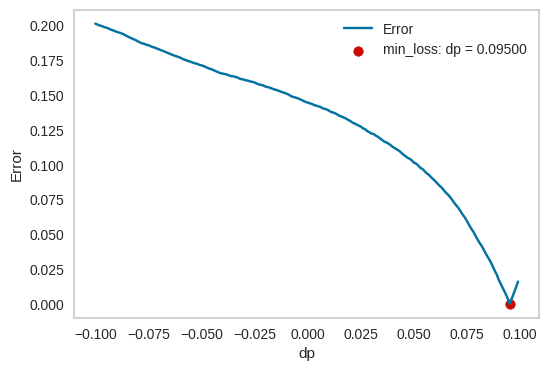

0.09500000000000017

In [62]:
from sklearn.metrics import f1_score

## 実際の目的変数の割合
weights_true = np.array(FE_train["MIS_Status"].value_counts().sort_index()) / len(FE_train)
## 解像度の設定
dp_lst = np.arange(-0.1, 0.1, 1e-3)  # 適切な範囲に調整してください

dp_opt = threshold_tuning_binary(prob_df, dp_lst, weights_true, target_col="MIS_Status") # 関数内で1は0の5倍減少（適宜変更）

dp_opt

In [63]:
# 予測確率を補正
prob_df['MIS_Status_0'] += dp_opt
prob_df['MIS_Status_1'] -= dp_opt*4.9 #2倍減らす(適宜変更)

# スライドした閾値に基づくクラス分類
pred_label = np.argmax(prob_df[['MIS_Status_0', 'MIS_Status_1']].values, axis=1)

In [64]:
# ユニークな要素とその出現回数を取得
unique_elements, counts = np.unique(pred_label, return_counts=True)

# ユニークな要素の割合を計算
percentages = 100 * counts / len(pred_label)

# 結果を表示
print(weights_true)

for element, percentage in zip(unique_elements, percentages):
    print(f"Element {element} occurs {percentage:.2f}% of the time.")

[0.10731085 0.89268915]
Element 0 occurs 10.42% of the time.
Element 1 occurs 89.58% of the time.


In [69]:
pred_label

array([0, 1, 0, ..., 1, 1, 0])

In [70]:
###提出ファイルの作成

sample_submission = pd.read_csv("/content/drive/MyDrive/signate/債務不履行/データセット/sample_submission.csv")

fin_pred = pd.DataFrame(pred_label, columns=['1'])
combined_df = pd.concat([sample_submission["0"], fin_pred], axis=1)
combined_df.columns = range(combined_df.shape[1])

# インデックスをリセット（必要に応じて古いインデックスを削除）
combined_fin_df = combined_df.reset_index(drop=True)

In [73]:
#提出ファイル出力
combined_fin_df.to_csv('/content/drive/MyDrive/signate/債務不履行/提出/submit_.csv', index=False)